<!--NAVIGATION-->
< [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) | [Contents](Index.ipynb) | [Fancy Indexing](02.07-Fancy-Indexing.ipynb) >

# Comparisons, Masks, and Boolean Logic

In [77]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

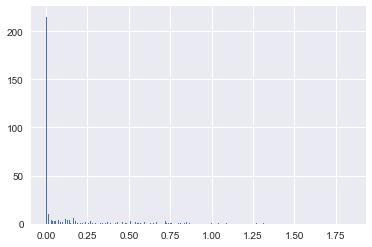

In [79]:
plt.hist(inches, 365);

## Comparison Operators as ufuncs


In [80]:
x = np.array([1, 2, 3, 4, 5])

In [81]:
x < 3  # less than

array([ True,  True, False, False, False], dtype=bool)

In [82]:
x > 3  # greater than

array([False, False, False,  True,  True], dtype=bool)

In [83]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False], dtype=bool)

In [84]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True], dtype=bool)

In [85]:
x != 3  # not equal

array([ True,  True, False,  True,  True], dtype=bool)

In [86]:
x == 3  # equal

array([False, False,  True, False, False], dtype=bool)

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [87]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False], dtype=bool)

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write ``x < 3``, internally NumPy uses ``np.less(x, 3)``.
    A summary of the comparison operators and their equivalent ufunc is shown here:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape.
Here is a two-dimensional example:

In [88]:
rng = np.random.RandomState(3)
x = rng.randint(10, size=(3, 4))
x

array([[8, 9, 3, 8],
       [8, 0, 5, 3],
       [9, 9, 5, 7]])

In [89]:
x < 6

array([[False, False,  True, False],
       [False,  True,  True,  True],
       [False, False,  True, False]], dtype=bool)

## Working with Boolean Arrays

Given a Boolean array, there are a host of useful operations you can do.
We'll work with ``x``, the two-dimensional array we created earlier.

In [90]:
print(x)

[[8 9 3 8]
 [8 0 5 3]
 [9 9 5 7]]


In [91]:
# how many values less than 6?
np.count_nonzero(x < 6)

5

In [92]:
np.sum(x < 6)

5

In [93]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([1, 3, 1])

In [94]:
# are there any values greater than 8?
np.any(x > 8)

True

In [95]:
# are there any values less than zero?
np.any(x < 0)

False

In [96]:
# are all values less than 10?
np.all(x < 10)

True

In [97]:
# are all values equal to 6?
np.all(x == 6)

False

``np.all`` and ``np.any`` can be used along particular axes as well. For example:

In [98]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([False, False, False], dtype=bool)

### Boolean operators

We've already seen how we might count, say, all days with rain less than four inches, or all days with rain greater than two inches.
But what if we want to know about all days with rain less than four inches and greater than one inch?
This is accomplished through Python's *bitwise logic operators*, ``&``, ``|``, ``^``, and ``~``.
Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.

For example, we can address this sort of compound question as follows:

In [99]:
np.sum((inches > 0.5) & (inches < 1))

29

In [100]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

The following table summarizes the bitwise Boolean operators and their equivalent ufuncs:

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

In [101]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Boolean Arrays as Masks

In [102]:
x

array([[8, 9, 3, 8],
       [8, 0, 5, 3],
       [9, 9, 5, 7]])

We can obtain a Boolean array for this condition easily, as we've already seen:

In [103]:
x < 5

array([[False, False,  True, False],
       [False,  True, False,  True],
       [False, False, False, False]], dtype=bool)

In [104]:
x[x < 5]

array([3, 0, 3])

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is ``True``.

We are then free to operate on these values as we wish.
For example, we can compute some relevant statistics on our Seattle rain data:

In [105]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.194881889764
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.850393700787
Median precip on non-summer rainy days (inches): 0.200787401575


By combining Boolean operations, masking operations, and aggregates, we can very quickly answer these sorts of questions for our dataset.

In [106]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True], dtype=bool)

Using ``or`` on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value:

In [107]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [39]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False, False], dtype=bool)

In [40]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<!--NAVIGATION-->
< [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) | [Contents](Index.ipynb) | [Fancy Indexing](02.07-Fancy-Indexing.ipynb) >